In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_train = pd.read_csv("data/train.csv")
raw_test = pd.read_csv("data/test.csv")

data = raw_train.copy()

In [4]:
display(data.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#How PCA works and how to use it to detecte variable significance
#How to automatically detect outliers

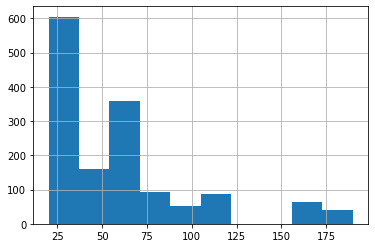

In [9]:
data['MSSubClass'].hist()

In [4]:
# display(data.info())
# display(data.info())
pd.options.display.max_rows = 100
display(data.shape)
n_rows = data.shape[0]

print("Percentage of Null values per column")
display((data.isnull().sum().sort_values(ascending = False)/n_rows).head(25))


(1460, 81)

Percentage of Null values per column


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
YearRemodAdd    0.000000
MSSubClass      0.000000
Foundation      0.000000
ExterCond       0.000000
ExterQual       0.000000
dtype: float64

In [5]:
#Remove Null columns with over 20% Nan's
data = data.drop(['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

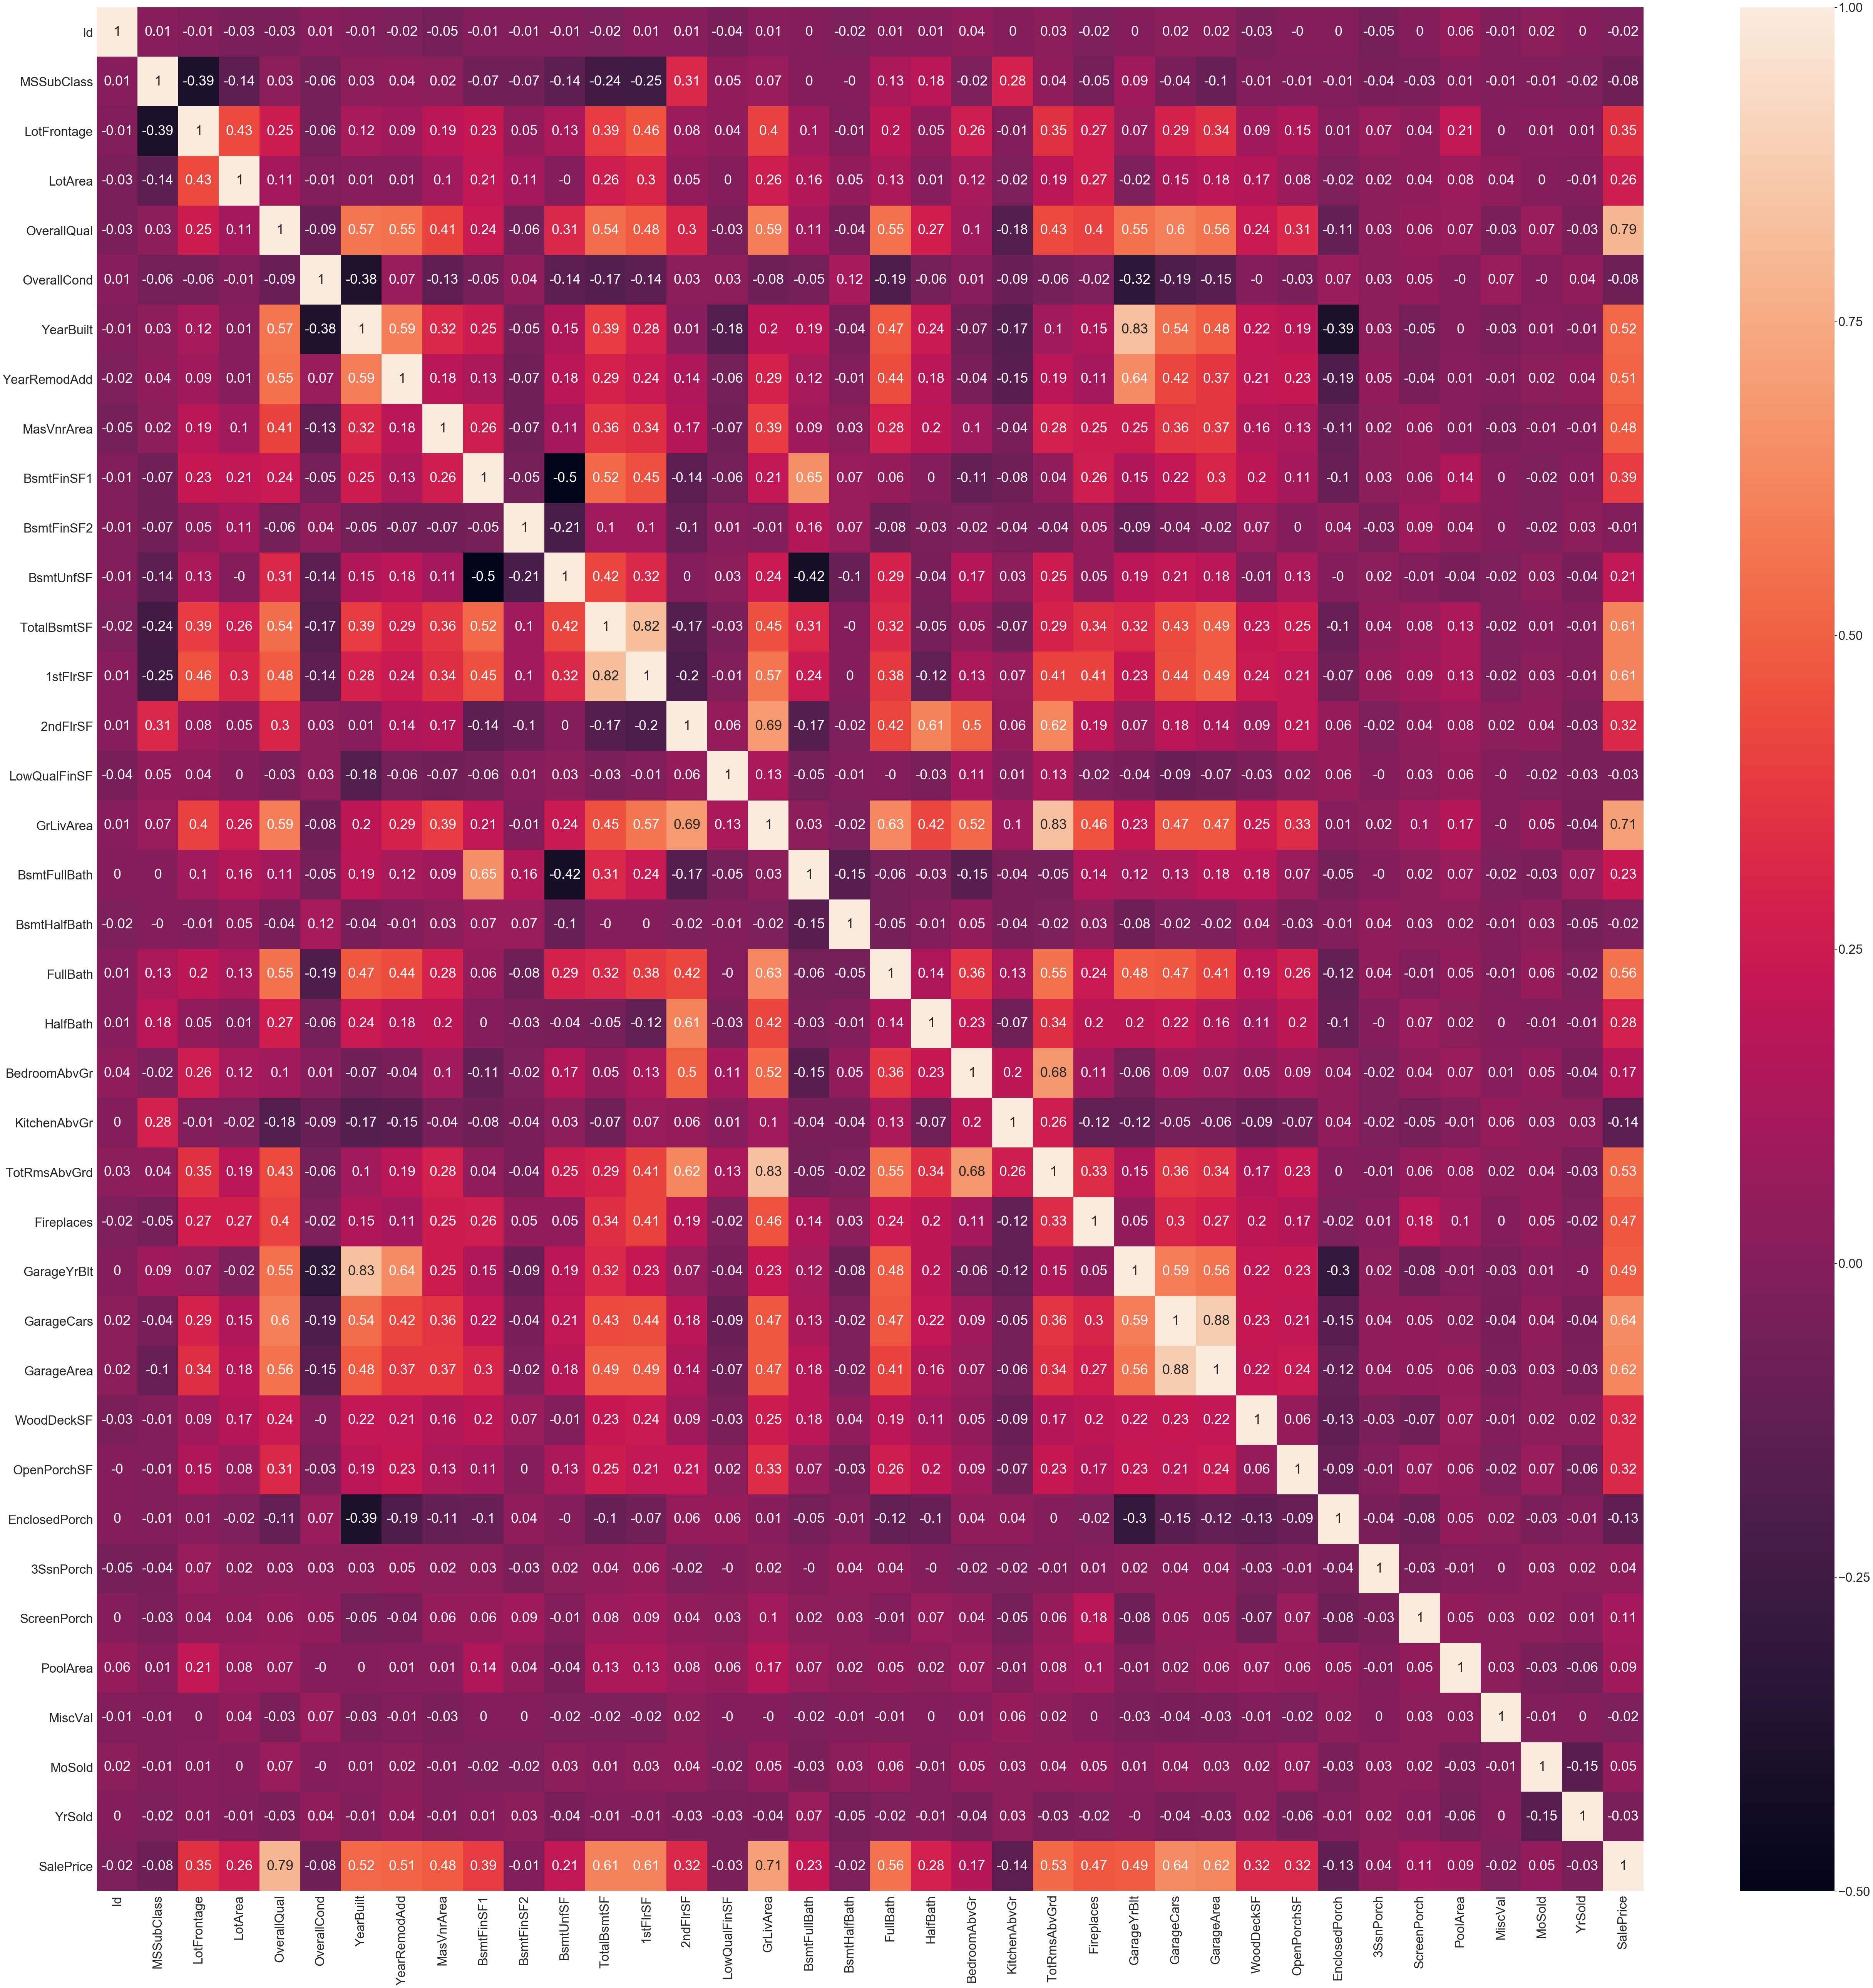

In [6]:
data[['LotArea','SalePrice']]

# plt.scatter(data['LotArea'], data['SalePrice'], alpha=0.5)
# plt.show()


corr_matrix = data.corr().round(2)
plt.figure(figsize=(90, 90))
sns.set(font_scale=3)
ax = sns.heatmap(corr_matrix, annot=True)#, fmt="d")

#Pair Plot of features with respect to survived
# cols = data.columns.to_list()[10:22]

# ax = sns.heatmap(flights, annot=True, fmt="d")
# cols.remove('SalePrice')
# sns.pairplot(data,hue='SalePrice',vars=cols,plot_kws={'alpha':0.5})

In [30]:
#Ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None

corr_subset = corr_matrix['SalePrice'][corr_matrix['SalePrice'].abs()>0.3]
# display(corr_subset)

data_subset = data[corr_subset.index]
# display(data_subset)


for col in data_subset.columns:
#     print(col)
    print(col , data_subset[col].unique()[0:10])

LotFrontage [65. 80. 68. 60. 84. 85. 75. nan 51. 50.]
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965]
MasVnrArea [196.   0. 162. 350. 186. 240. 286. 306. 212. 180.]
BsmtFinSF1 [ 706  978  486  216  655  732 1369  859    0  851]
TotalBsmtSF [ 856 1262  920  756 1145  796 1686 1107  952  991]
1stFlrSF [ 856 1262  920  961 1145  796 1694 1107 1022 1077]
2ndFlrSF [ 854    0  866  756 1053  566  983  752 1142 1218]
GrLivArea [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077]
FullBath [2 1 3 0]
TotRmsAbvGrd [ 8  6  7  9  5 11  4 10 12  3]
Fireplaces [0 1 2 3]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939.]
GarageCars [2 3 1 0 4]
GarageArea [548 460 608 642 836 480 636 484 468 205]
WoodDeckSF [  0 298 192  40 255 235  90 147 140 160]
OpenPorchSF [ 61   0  42  35  84  30  57 204   4  21]
SalePrice [208500 181500 223500 140000 250000 143000 307000

In [42]:
data_subset['YearBuilt_age_'] = (data_subset['YearBuilt'].max() - data_subset['YearBuilt'])
data_subset['YearRemodAdd_age_'] = (data_subset['YearRemodAdd'].max() - data_subset['YearRemodAdd']) 
data_subset['GarageYrBlt_age_'] = (data_subset['GarageYrBlt'].max() - data_subset['GarageYrBlt'])

# sale_price = data_subset['SalePrice']
df=data_subset.drop(['SalePrice'],axis=1)

data=(df-df.min())/(df.max()-df.min())
data['SalePrice'] = data_subset['SalePrice']
data

# # display(data_subset)
# from sklearn import preprocessing

# x = data_subset.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# data_scaled = pd.DataFrame(x_scaled)

# data_scaled

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_age_,YearRemodAdd_age_,GarageYrBlt_age_,SalePrice
0,0.150685,0.666667,0.949275,0.883333,0.122500,0.125089,0.140098,0.119780,0.413559,0.259231,...,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.050725,0.116667,0.063636,208500
1,0.202055,0.555556,0.753623,0.433333,0.000000,0.173281,0.206547,0.212942,0.000000,0.174830,...,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.246377,0.566667,0.309091,181500
2,0.160959,0.666667,0.934783,0.866667,0.101250,0.086109,0.150573,0.134465,0.419370,0.273549,...,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.065217,0.133333,0.081818,223500
3,0.133562,0.666667,0.311594,0.333333,0.000000,0.038271,0.123732,0.143873,0.366102,0.260550,...,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.688406,0.666667,0.109091,140000
4,0.215753,0.777778,0.927536,0.833333,0.218750,0.116052,0.187398,0.186095,0.509927,0.351168,...,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.072464,0.166667,0.090909,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.555556,0.920290,0.833333,0.000000,0.000000,0.155974,0.142038,0.336077,0.247362,...,0.333333,0.900000,0.50,0.324401,0.000000,0.073126,0.079710,0.166667,0.100000,175000
1456,0.219178,0.555556,0.768116,0.633333,0.074375,0.139972,0.252373,0.399036,0.000000,0.327619,...,0.666667,0.709091,0.50,0.352609,0.407235,0.000000,0.231884,0.366667,0.290909,210000
1457,0.154110,0.666667,0.500000,0.933333,0.000000,0.048724,0.188543,0.195961,0.557869,0.377920,...,0.666667,0.372727,0.25,0.177715,0.000000,0.109689,0.500000,0.066667,0.627273,266500
1458,0.160959,0.444444,0.565217,0.766667,0.000000,0.008682,0.176432,0.170721,0.000000,0.140166,...,0.000000,0.454545,0.25,0.169252,0.427071,0.000000,0.434783,0.233333,0.545455,142125


In [62]:
from statistics import mean
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit


#Separing into independent (X) and dependent(Y) variables

data = data.dropna()
# display(data.shape)
X = data.drop(['SalePrice'],axis=1).values
y = data.SalePrice.values

#Simple train test split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf = LogisticRegression().fit(xTrain, yTrain)
train_predictions = clf.predict(xTest)
result = pd.concat([pd.Series(yTest), pd.Series(train_predictions)], axis=1)
result.columns=['Test','Train']
result['MSE']=((result['Test']-result['Train']).pow(2))/len(result)
result.sum()
# display(pd.DataFrame(yTest))
# acc = accuracy_score(yTest, train_predictions)
# display(acc)

Test     4.064951e+07
Train    3.585000e+07
MSE      3.374415e+09
dtype: float64